## Lesson 3: Visualizing Embeddings

In [1]:
import os
import getpass
import pandas as pd


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

False

In [3]:
import openai
openai.api_key = os.getenv("OPENAI_API_KEY")

In [4]:
#!pip install --upgrade utils

## Embeddings capture meaning

In [5]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [6]:
input_text_lst_news

['Missing flamingo discovered at swimming pool',
 'Sea otter spotted on surfboard by beach',
 'Baby panda enjoys boat ride',
 'Breakfast themed food truck beloved by all!',
 'New curry restaurant aims to please!',
 'Python developers are wonderful people',
 'TypeScript, C++ or Java? All are great!']

In [7]:
#from sentence_transformers import SentenceTransformer
#transformer = SentenceTransformer('all-MiniLM-L6-v2')
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [8]:
import numpy as np


In [9]:

from openai import OpenAI
client = OpenAI()

In [10]:
def get_embedding(text_to_embed):
    # Embed a line of text
    response = client.embeddings.create(
        model= "text-embedding-ada-002",
        input=[text_to_embed]
    )

    # Extract the AI output embedding as a list of floats
    embedding = response.data[0].embedding
    
    return embedding

In [11]:
embedding = []
for input_text in input_text_lst_news:
    emb = get_embedding(input_text)
    embedding.append(emb)
    
embeddings_array = np.array(embedding) 

In [12]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 1536)
[[-0.00824171  0.00510265 -0.0217998  ... -0.01012515  0.00593083
  -0.0282115 ]
 [-0.00592886 -0.00943525 -0.01307875 ...  0.00046891  0.00195071
  -0.03048009]
 [ 0.004457   -0.02837765  0.01950964 ... -0.02194013 -0.02049497
  -0.01991691]
 ...
 [ 0.01350152 -0.01733908 -0.00471519 ... -0.02072947  0.00483198
  -0.01565723]
 [ 0.01682796 -0.00730056  0.0181214  ... -0.0138144  -0.00536708
  -0.02960228]
 [ 0.01091233 -0.01511244  0.00869265 ... -0.02979956  0.01507257
  -0.03243128]]


#### Reduce embeddings from 768 to 2 dimensions for visualization
- We'll use principal component analysis (PCA).
- You can learn more about PCA in [this video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) from the Machine Learning Specialization. 

In [13]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 4)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [14]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 4)
[[-0.26402223 -0.1277034   0.34311293  0.05828213]
 [-0.22932253 -0.13627882 -0.07690527 -0.21857229]
 [-0.22860589 -0.12330084 -0.26219397  0.10413167]
 [-0.03608862  0.34626087 -0.07300068 -0.09680456]
 [ 0.05827896  0.33435465  0.07198692  0.11423557]
 [ 0.27871849 -0.16413208 -0.05232821  0.26269495]
 [ 0.42104181 -0.12920037  0.04932828 -0.22396748]]


In [15]:
input_text_lst =[
        "Hi there!",
        "Oh, hello!",
        "What's your name?",
        "My friends call me World",
        "Hello World!"
    ]

In [16]:
embedding = []
for input_text in input_text_lst:
    emb = get_embedding(input_text)
    embedding.append(emb)
    
embeddings_array1 = np.array(embedding) 

In [17]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 3)
PCA_model.fit(embeddings_array1)
new_values1 = PCA_model.transform(embeddings_array1)

In [18]:
print("Shape: " + str(new_values1.shape))
print(new_values1)

Shape: (5, 3)
[[-0.22865025 -0.02979492  0.03317837]
 [-0.22988376  0.01851413 -0.19561611]
 [ 0.14619116  0.37578868  0.06055238]
 [ 0.36008115 -0.18364619 -0.10144468]
 [-0.0477383  -0.18086171  0.20333004]]


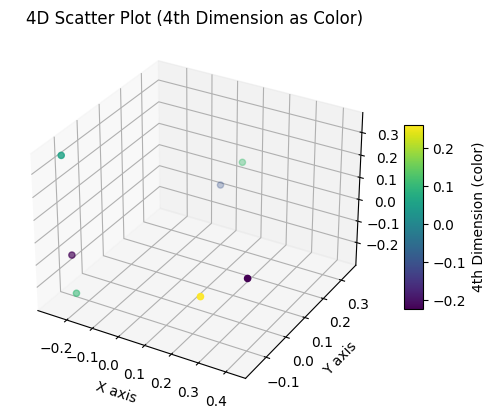

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data points
points = np.array([
    [-0.26402223, -0.1277034,  0.34311293,  0.05828213],
    [-0.22932253, -0.13627882, -0.07690527, -0.21857229],
    [-0.22860589, -0.12330084, -0.26219397,  0.10413167],
    [-0.03608862,  0.34626087, -0.07300068, -0.09680456],
    [ 0.05827896,  0.33435465,  0.07198692,  0.11423557],
    [ 0.27871849, -0.16413208, -0.05232821,  0.26269495],
    [ 0.42104181, -0.12920037,  0.04932828, -0.22396748]
])

# Extract x, y, z coordinates and fourth dimension for color
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]
c = points[:, 3]  # Fourth dimension as color

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(x, y, z, c=c, cmap='viridis', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Add color bar to represent the 4th dimension
colorbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
colorbar.set_label('4th Dimension (color)')

plt.title("4D Scatter Plot (4th Dimension as Color)")
plt.show()
